## Description:

This time, the data has the following structure:

- recorded for each user who made purchases, every day
- for each date, there is a separate folder, inside it – folders for each user
- inside each folder, there is a file data.csv, where the data is stored

Schematically, it looks like this:

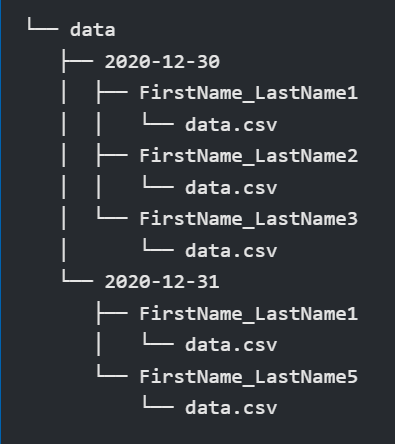

For example, on December 30th, three customers made purchases, and on the 31st – two (folders 2020-12-30 and 2020-12-31 respectively). Since the customer FirstName_LastName1 bought goods on both days, there is a folder for him in the folder for each of these dates. For other customers – one each.

## Tasks

- Collect all the data from the "data" folder into a single dataframe, having the following columns: columns from the files themselves (product_id, quantity), as well as the username (name), and the date of these purchases (date), corresponding to the name of the folder where the user's folder is located.
- Find out which user bought the most products. If there are several, list the names in alphabetical order, separated by a comma and a space.
- Find the top 10 products by the number of units sold over time and create a bar plot. How many units of the product with product_id==56 were sold?
- Visualize sales by days.
- How many users have purchased any product more than once (repeatedly)? A repeat will be considered as the purchase of a product with the same product_id, made on different days.

1. Collect all the data from the "data" folder into a single dataframe, having the following columns: columns from the files themselves (product_id, quantity), as well as the username (name), and the date of these purchases (date), corresponding to the name of the folder where the user's folder is located.

In [5]:
from pathlib import Path
import os
import pandas as pd

In [6]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/4/data/'

In [7]:
# Create df for all data.
df = pd.DataFrame()

# Read data from all files and add it to general df
for current_path, dirs, files in os.walk(path):
    for file in files:
        part_path = Path(current_path)
# Construct full path to file
        data_path = part_path / file
        
# Read data
        temp_df = pd.read_csv(data_path)
    
# Extract date and name
        date = data_path.parts[-3]
        name = data_path.parts[-2]
        
# Add date and name columns
        temp_df['date'] = date
        temp_df['name'] = name
        
# Insert data into main df
        df = pd.concat((df, temp_df))

In [8]:
# or use .glob method

# df = pd.DataFrame()

# for csv_path in miniproject_path.glob('**/*.csv'):
#     temp_df = pd.read_csv(csv_path)
    # Extract date and name
    
#         date = data_path.parts[-3]
#         name = data_path.parts[-2]
        
# Add date and name columns

#         temp_df['date'] = date
#         temp_df['name'] = name

#     df = pd.concat((df, temp_df))

In [9]:
df = df.drop(columns = ['Unnamed: 0'])

In [10]:
df

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [11]:
df.quantity.sum()

480

2. Find out which user bought the most products. If there are several, list the names in alphabetical order, separated by a comma and a space.

In [12]:
df.groupby('name', as_index = False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


3. Find the top 10 products by the number of units sold over time and create a bar plot. How many units of the product with product_id==56 were sold?

In [13]:
most_populat_products = df\
.groupby('product_id', as_index = False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending = False)\
.head(10)

In [14]:
most_populat_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

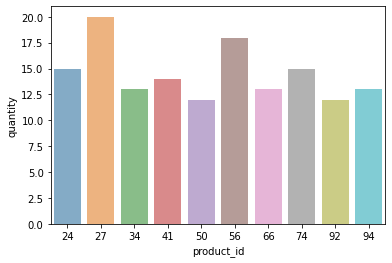

In [16]:
sns.barplot(data = most_populat_products, x = 'product_id', y = 'quantity', alpha = 0.6)

4. Visualize sales by days.

In [17]:
most_populat_days = df\
.groupby('date', as_index = False)\
.agg({'quantity': 'sum'})\
.sort_values('quantity', ascending = False)

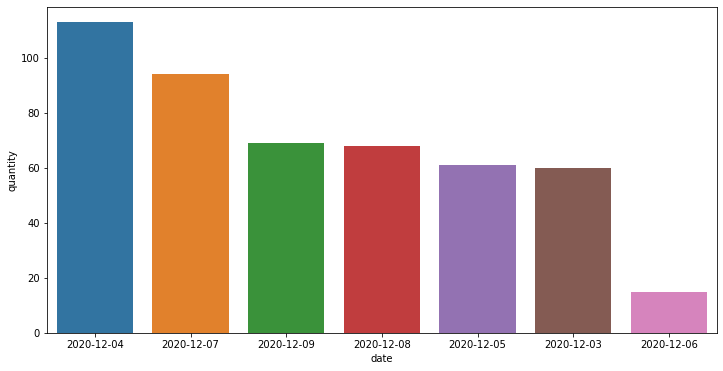

In [18]:
plt.figure(figsize = (12, 6))
sns.barplot(data = most_populat_days, x = 'date', y = 'quantity')

5. How many users have purchased any product more than once (repeatedly)? A repeat will be considered as the purchase of a product with the same product_id, made on different days.

In [19]:
duplicate = df[df.duplicated('product_id')]

In [20]:
duplicate

,product_id,quantity,date,name
0,66,2,2020-12-05,Kirill_Smirnov
0,41,4,2020-12-05,Alexey_Petrov
2,33,1,2020-12-05,Alexey_Petrov
0,89,4,2020-12-08,Petr_Petrov
2,13,1,2020-12-08,Petr_Petrov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [21]:
df.drop_duplicates(subset = ['product_id', 'date', 'name'])

,product_id,quantity,date,name
0,27,4,2020-12-05,Petr_Ivanov
1,89,1,2020-12-05,Petr_Ivanov
2,33,2,2020-12-05,Petr_Ivanov
3,8,3,2020-12-05,Petr_Ivanov
4,16,1,2020-12-05,Petr_Ivanov
...,...,...,...,...
0,18,4,2020-12-07,Petr_Fedorov
1,94,4,2020-12-07,Petr_Fedorov
0,95,2,2020-12-07,Vasiliy_Ivanov
1,83,3,2020-12-07,Vasiliy_Ivanov


In [22]:
more_than_one_purchase_df = df.groupby(['name', 'product_id'], as_index = False).agg({'quantity': pd.Series.nunique}).query('quantity > 1')

In [23]:
more_than_one_purchase_df

,name,product_id,quantity
30,Alexey_Smirnov,55,2
37,Anton_Ivanov,15,2


## Additional Project

And a small mini-project on data filtering!

There is a table with records about companies, including their INN (Taxpayer Identification Number), and a separate text file with a set of INN (column head_inn), which are stored in the folder 4_inn.

- inn.xls — a table in Excel format
- necessary_inn.txt — a list of necessary INN in text format


### Tasks:

- extract from the table the records with INN specified in the text file
- write the result to the file selected_inn.csv

In [24]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/4_inn/inn.xls'

In [25]:
df = pd.read_excel(path_to_file)

In [28]:
p = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-borschigov/shared/homeworks/python_ds_miniprojects/4_inn/necessary_inn.txt'

In [29]:
inn_data = pd.read_csv(p, header = None, squeeze = True)

In [30]:
core_df = df.query('head_inn in @inn_data')

In [31]:
core_df['income,RUB'].sum()

6104522627393

In [32]:
core_df.to_csv('core_df.csv')